In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
con = sqlite3.connect('//home/niteshch/Downloads/database.sqlite')
loan = pd.read_csv('/home/niteshch/Downloads/loan_cleaned_2.csv')
loan_orig = pd.read_csv('/home/niteshch/Downloads/loan_cleaned_1.csv')

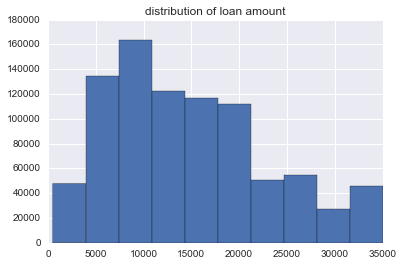

In [5]:
plt.rc("figure", figsize=(6, 4))
loan["loan_amnt"].hist()
plt.title("distribution of loan amount")

In [4]:
loan_rate_related = pd.read_sql_query( """
SELECT loan_amnt, term, int_rate, grade, emp_title, emp_length, home_ownership, annual_inc,issue_d,
purpose, title, addr_state,application_type, loan_status,dti,
CASE WHEN loan_amnt < 8000 THEN 'low' 
     WHEN loan_amnt >= 8000 AND loan_amnt < 13000 THEN 'medium-low'
     WHEN loan_amnt >= 13000 AND loan_amnt < 20000 THEN 'medium-high'
     WHEN loan_amnt >= 20000 THEN 'high' END as loan_amnt_level,
CASE WHEN annual_inc < 45000 THEN 'low'
     WHEN annual_inc >= 45000 AND annual_inc <65000 THEN 'medium-low'
     WHEN annual_inc >= 65000 AND annual_inc < 90000 THEN 'medium-high'
     WHEN annual_inc >= 90000 THEN 'high' END as annual_inc_level,
CASE WHEN loan_status = 'Fully Paid' THEN 1
     WHEN loan_status = 'Current' THEN 2
     WHEN loan_status = 'Charged Off' THEN 3
     WHEN loan_status = 'Default' THEN 4 
     WHEN loan_status = 'Late (31-120 days)' THEN 5
     WHEN loan_status = 'In Grace Period' THEN 6 
     WHEN loan_status = 'Late (16-30 days)' THEN 7 
     WHEN loan_status = 'Does not meet the credit policy. Status:Fully Paid' THEN 8
     WHEN loan_status = 'Does not meet the credit policy. Status:Charged Off' THEN 9 
     WHEN loan_status = 'Issued' THEN 10 END as loan_status_numeric
FROM loan
""",con)

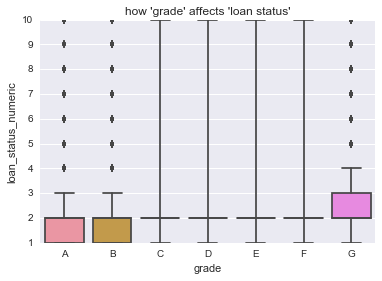

In [37]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='grade',y="loan_status_numeric",data = loan_rate_related,order=["A","B","C","D","E","F","G"])
plt.title("how 'grade' affects 'loan status'")

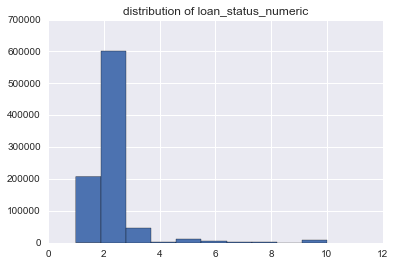

In [43]:
plt.rc("figure", figsize=(6, 4))
loan_rate_related["loan_status_numeric"].hist()
plt.title("distribution of loan_status_numeric")

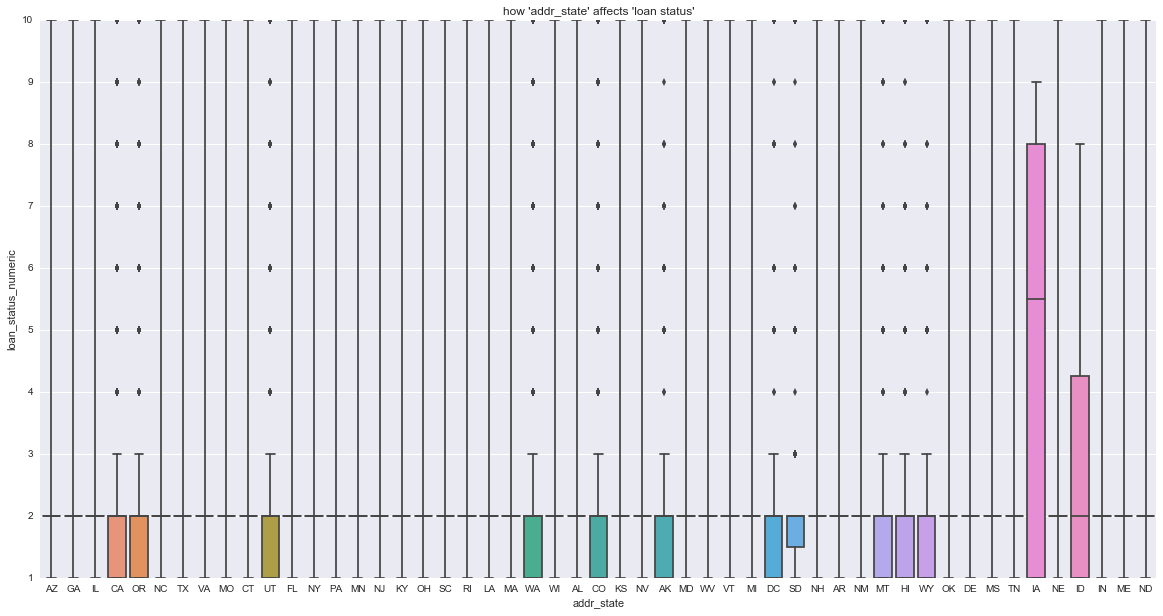

In [9]:
plt.rc("figure", figsize=(20, 10))
sns.boxplot(x='addr_state',y="loan_status_numeric",data = loan_rate_related)
plt.title("how 'addr_state' affects 'loan status'")